# Praktikum IF3270 2023/2024

Tujuan praktikum IF3270 Pembelajaran Mesin:
1.   Peserta memahami rangkaian proses analitik data menggunakan pendekatan pembelajaran mesin.
2.   Peserta memahami bahwa proses pengembangan model pembelajaran mesin juga ditentukan dari kualitas data, penanganan data, dan penentuan algoritma serta hyperparameter-nya; tidak cukup hanya dengan memastikan implementasi algoritma berjalan tanpa kesalahan.
3.   Peserta mampu menginterpretasikan hasil dari evaluasi model dalam proses analitik menggunakan pendekatan pembelajaran mesin.

Praktikum dilaksanakan secara berkelompok. Setiap kelompok terdiri atas 2 mahasiswa. Perhatikan bahwa terdapat berkas yang harus dikumpulkan saat keberjalanan praktikum untuk bagian A (25 April 2024, pukul 12.00 WIB) dan berkas yang dikumpulkan setelah waktu praktikum selesai untuk bagian B (25 April 2024, pukul 21.00 WIB).

Disediakan data yang sudah dibagi menjadi data latih (`df_train`), data validasi (`df_val`), dan data uji (`df_test`).

**Bagian 1**: (batas waktu: 25 April 2024, 12.00 WIB)

1. Buatlah _baseline_ dengan menggunakan model _logistic regression_.
2. Lakukan analisis data terkait hal berikut:
    - _duplicate value_,
    - _missing value_,
    - _outlier_,
    - _balance of data_.
3. Jelaskan rencana penanganan yang ada pada poin 2.
4. Jelaskan teknik _encoding_ yang digunakan terhadap data yang disediakan apabila dilakukan, disertai dengan alasan.
5. Buatlah desain eksperimen dengan menentukan hal berikut:
    - tujuan eksperimen,
    - variabel dependen dan independen,
    - strategi eksperimen,
    - skema validasi.
    
**Bagian 2**: (batas waktu: 25 April 2024, 21.00 WIB)

6. Implementasikan strategi eksperimen dan skema validasi yang telah ditentukan pada poin 5.
7. Berdasarkan hasil prediksi yang dihasilkan, buatlah kesimpulan analisis **hasil diabetes**.

---
Catatan:
- Jika terdapat perubahan jawaban pada poin 1—5 (contoh: perbedaan penanganan _outlier_), jelaskan pada laporan mengenai jawaban sebelum, jawaban sesudah, dan alasan pengubahan jawaban.
- Eksperimen dapat berupa penggantian model klasifikasi, pengaturan hyperparameter, model stacking, grid search, oversampling, undersampling, dan lain sebagainya. Semakin variatif eksperimen yang dilakukan, semakin baik.

## Dataset
`diabetes.csv` merupakan dataset yang telah dimodifikasi dari [Diabetes Health Indicators Dataset](https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset/) sebagai kumpulan indikator individu yang diperoleh dari survei untuk kasus diabetes. Dataset ini berguna untuk melakukan prediksi diabetes sehingga suatu individu dapat diketahui memiliki risiko tinggi diabetes atau tidak. Hal ini diperoleh dari fitur-fitur yang dapat dianalisis lebih lanjut sebelum mencapai kesimpulan.

Berikut adalah deskripsi singkat setiap kolom:

1. **HighBP**: Memiliki tekanan darah tinggi (BP: Blood Pressure) atau tidak
2. **HighChol**: Kolesterol tinggi atau tidak
3. **BMI**: Besaran Body Mass Index
4. **Smoker**: Perokok atau bukan perokok
5. **Stroke**: Pernah mengalami struk atau tidak
6. **HeartDiseaseorAttack**: Memiliki riwayat penyakit antara jantung koroner dan serangan jantung atau tidak sama sekali
7. **PhysActivity**: Aktif secara fisik dalam 30 hari terakhir atau tidak
8. **Fruits**: Mengonsumsi buah setiap hari atau tidak
9. **Veggies**: Mengonsumsi sayur setiap hari atau tidak
10. **HvyAlcoholConsump**: Peminum berat alkohol atau bukan
11. **AnyHealthcare**: Memiliki perlindungan kesehatan atau tidak, contohnya memiliki asuransi kesehatan
12. **GenHtlth**: Evaluasi mandiri terhadap kesehatan, skala 1-5 (1: Sangat baik, 2: Cukup Baik, 3: Baik, 4: Biasa saja, 5: Buruk)
13. **MentHlth**: Jumlah hari keadaan mental buruk dalam 30 hari terakhir (skala 0-30 hari)  
14. **PhysHlth**: Jumlah hari keadaan fisik buruk dalam 30 hari terakhir (skala 0-30 hari)
15. **DiffWalk**: Memiliki kesulitan berjalan atau menaiki tangga
16. **Sex**: (M) Male atau (F) Female
17. **Age**: 13 kategori umur (1: 18-24 tahun, 9: 60-64 tahun, 13: 80 tahun ke atas)
18. **Education**: Level edukasi skala 1-6 (1: Tidak pernah sekolah atau hanya TK, 2: SD, dst)
19. **Income**: Skala pendapatan 1-8
20. **Diabetes**: Apakah mengalami diabetes atau tidak (Kolom target)

In [1]:
# Import library di sini
import pandas as pd
import copy
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
from IPython.display import display, Markdown, Latex

In [2]:
data = pd.read_csv("diabetes.csv")

In [3]:
X = data.drop(columns="Diabetes")
y = data["Diabetes"].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=123)

# Gunakan data validasi untuk bereksperimen dengan model
# Gunakan data test untuk mengevaluasi model hanya di akhir eksperimen
df_train = pd.concat([X_train, y_train], axis=1)
df_val = pd.concat([X_val, y_val], axis=1)
df_test = pd.concat([X_test, y_test], axis=1)

_Deliverable_ yang akan dihasilkan adalah sebagai berikut:
1. berkas _notebook_ dengan format nama `PraktikumIF3270_M1_NIM1_NIM2.ipynb` untuk Bagian 1;
2. berkas _notebook_ dengan format nama `PraktikumIF3270_M2_NIM1_NIM2.ipynb` untuk Bagian 1 + Bagian 2; serta
3. berkas laporan dengan format nama `PraktikumIF3270_NIM1_NIM2.pdf` yang mencakup hal berikut:
    - hasil analisis data,
    - penanganan dari hasil analisis data,
    - justifikasi teknik-teknik yang dipilih,
    - perubahan yang dilakukan pada jawaban poin 1—5 jika ada,
    - desain eksperimen,
    - hasil eksperimen,
    - analisis dari hasil eksperimen,
    - kesimpulan,
    - pembagian tugas/kerja per anggota kelompok

Batas waktu pengumpulan:
- _Deliverable_ poin 1: Senin, 25 April 2023, pukul 12.00 WIB
- _Deliverable_ poin 2: Senin, 25 April 2023, pukul 21.00 WIB
- _Deliverable_ poin 3: Senin, 25 April 2023, pukul 21.00 WIB

# Bagian 1

## 1. Baseline dengan model logistic regression

In [4]:
def base_line_logistic_model():
    encoder = LabelEncoder()
    X_train["Sex"] = encoder.fit_transform(X_train["Sex"])
    X_test["Sex"] = encoder.fit_transform(X_test["Sex"])
    lr = LogisticRegression(max_iter=1000)
    lr.fit(X_train, y_train)

    y_pred = lr.predict(X_test)

    print("Confusion matrix dari model logistic regression: ")
    print(pd.DataFrame(confusion_matrix(y_test, y_pred), columns = ['Predicted No', 'Predicted Yes'], index = ['Actual No', 'Actual Yes']))
    print(classification_report(y_test, y_pred))

base_line_logistic_model()

Confusion matrix dari model logistic regression: 
            Predicted No  Predicted Yes
Actual No           8564            168
Actual Yes          1216            200
              precision    recall  f1-score   support

       False       0.88      0.98      0.93      8732
        True       0.54      0.14      0.22      1416

    accuracy                           0.86     10148
   macro avg       0.71      0.56      0.57     10148
weighted avg       0.83      0.86      0.83     10148



## 2. Analisis data

### Ukuran data

In [5]:
print(f"Size: {data.size}")
print(f"Rows: {data.shape[0]}")
print(f"Columns: {data.shape[1]}")

Size: 1014720
Rows: 50736
Columns: 20


### Statistik data

In [18]:
numerical = ["BMI","MentHlth", "PhysHlth"]
categorical = [col for col in data.columns if col not in numerical]

categorical_data = data[categorical]
numerical_data = data[numerical]

display(Markdown("# Numerical data"))
numerical_data.info()
numerical_data.describe()

display(Markdown("# Kategorikal data"))
categorical_data.info()
categorical_data.describe()

# Numerical data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50736 entries, 0 to 50735
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   BMI       50736 non-null  float64
 1   MentHlth  50736 non-null  float64
 2   PhysHlth  50736 non-null  float64
dtypes: float64(3)
memory usage: 1.2 MB


# Kategorikal data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50736 entries, 0 to 50735
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   HighBP                50736 non-null  float64
 1   HighChol              50736 non-null  float64
 2   Smoker                50736 non-null  float64
 3   Stroke                50736 non-null  float64
 4   HeartDiseaseorAttack  50736 non-null  float64
 5   PhysActivity          50736 non-null  float64
 6   Fruits                50736 non-null  float64
 7   Veggies               50736 non-null  float64
 8   HvyAlcoholConsump     50736 non-null  float64
 9   AnyHealthcare         50736 non-null  float64
 10  GenHlth               50736 non-null  float64
 11  DiffWalk              50736 non-null  float64
 12  Sex                   50736 non-null  object 
 13  Age                   50736 non-null  float64
 14  Education             50736 non-null  float64
 15  Income             

,HighBP,HighChol,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,GenHlth,DiffWalk,Age,Education,Income
count,50736.000000,50736.000000,50736.000000,50736.000000,50736.000000,50736.000000,50736.000000,50736.000000,50736.000000,50736.000000,50736.000000,50736.000000,50736.000000,50736.000000,50736.000000
mean,0.426916,0.420845,0.446547,0.040267,0.092498,0.754514,0.633594,0.812874,0.054675,0.952657,2.512614,0.169268,8.025091,5.045136,6.054084
std,0.494635,0.493700,0.497139,0.196587,0.289731,0.430379,0.481827,0.390016,0.227347,0.212374,1.068206,0.374992,3.053903,0.989395,2.074315
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,2.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,0.000000,8.000000,5.000000,7.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,3.000000,0.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000,13.000000,6.000000,8.000000


### Duplicate value

In [7]:
# Duplicate value
print("banyak baris duplikat: ", data.duplicated().sum(), "dari", data.shape[0])
print("persentase duplikat: ", data.duplicated().sum() / data.shape[0] * 100, "%")

banyak baris duplikat:  2329 dari 50736
persentase duplikat:  4.590428886786502 %


Dari data di atas, dapat disimpulkan terdapat duplikat data

### Missing value

In [8]:
# Missing value
print("Missing values:")

missing_value = pd.DataFrame()
missing_value['jumlah missing value'] = data.isnull().sum().to_frame()
missing_value['persentase missing value (%)'] = (missing_value['jumlah missing value'] / data.shape[0]) * 100

display(missing_value)

Missing values:


,jumlah missing value,persentase missing value (%)
HighBP,0,0.0
HighChol,0,0.0
BMI,0,0.0
Smoker,0,0.0
Stroke,0,0.0
HeartDiseaseorAttack,0,0.0
PhysActivity,0,0.0
Fruits,0,0.0
Veggies,0,0.0
HvyAlcoholConsump,0,0.0


Dari tabel di atas, dapat disimpulkan bahwa tidak terdapat missing value pada semua atribut data.

### Outlier

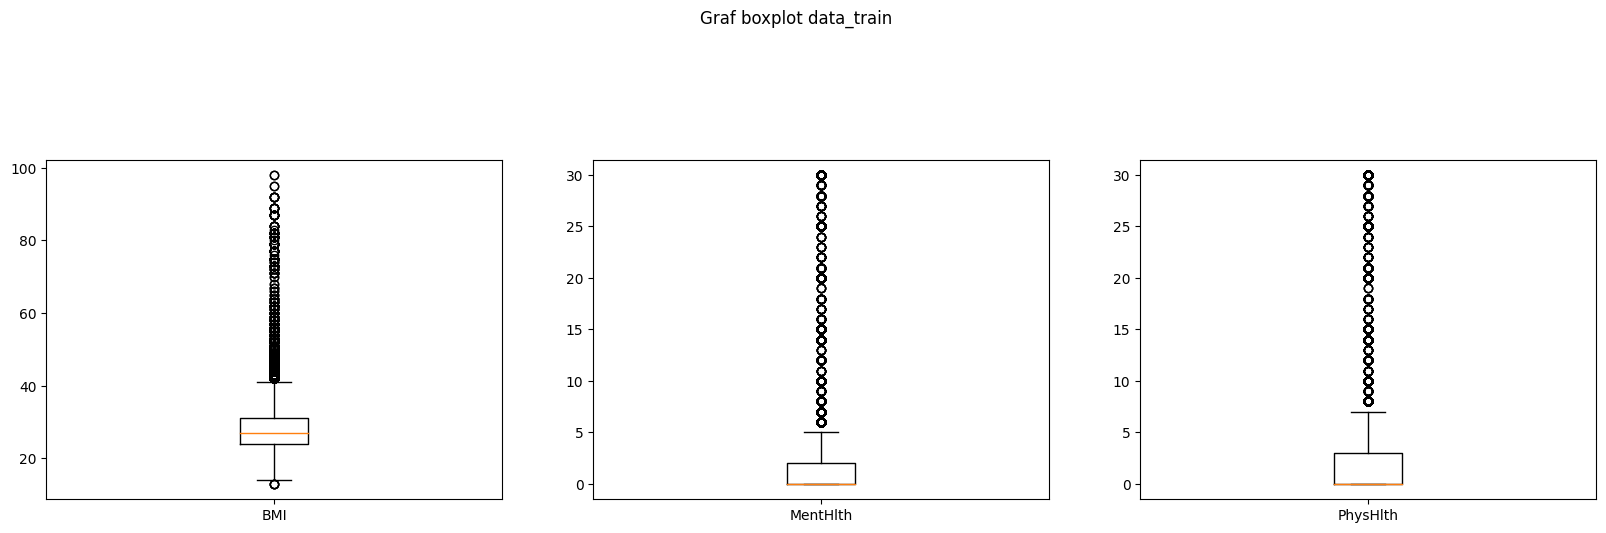

In [9]:
# Outlier

# Graf boxplot seluruh atribut data numerik

fig = plt.figure(figsize=(20,15))
for i, col in enumerate(numerical_data.columns):
    ax = fig.add_subplot(3, 3, i+1)
    plt.boxplot(numerical_data[col], labels=[col])
plt.suptitle("Graf boxplot data_train")
plt.show()


In [10]:
print("Banyak nilai outlier tiap atribut numerik:")

for col in numerical_data:
  col_data = numerical_data[col]
  iqr = col_data.quantile(.75) - col_data.quantile(.25)
  data_outlier = data.loc[(col_data < col_data.quantile(.25) - 1.5 * iqr) | (col_data > col_data.quantile(.75) + 1.5 * iqr)]
  outlier_size = len(data_outlier[col])
  print(f"{col}: {outlier_size} dari {data.shape[0]}")

Banyak nilai outlier tiap atribut numerik:
BMI: 1979 dari 50736
MentHlth: 7308 dari 50736
PhysHlth: 8198 dari 50736


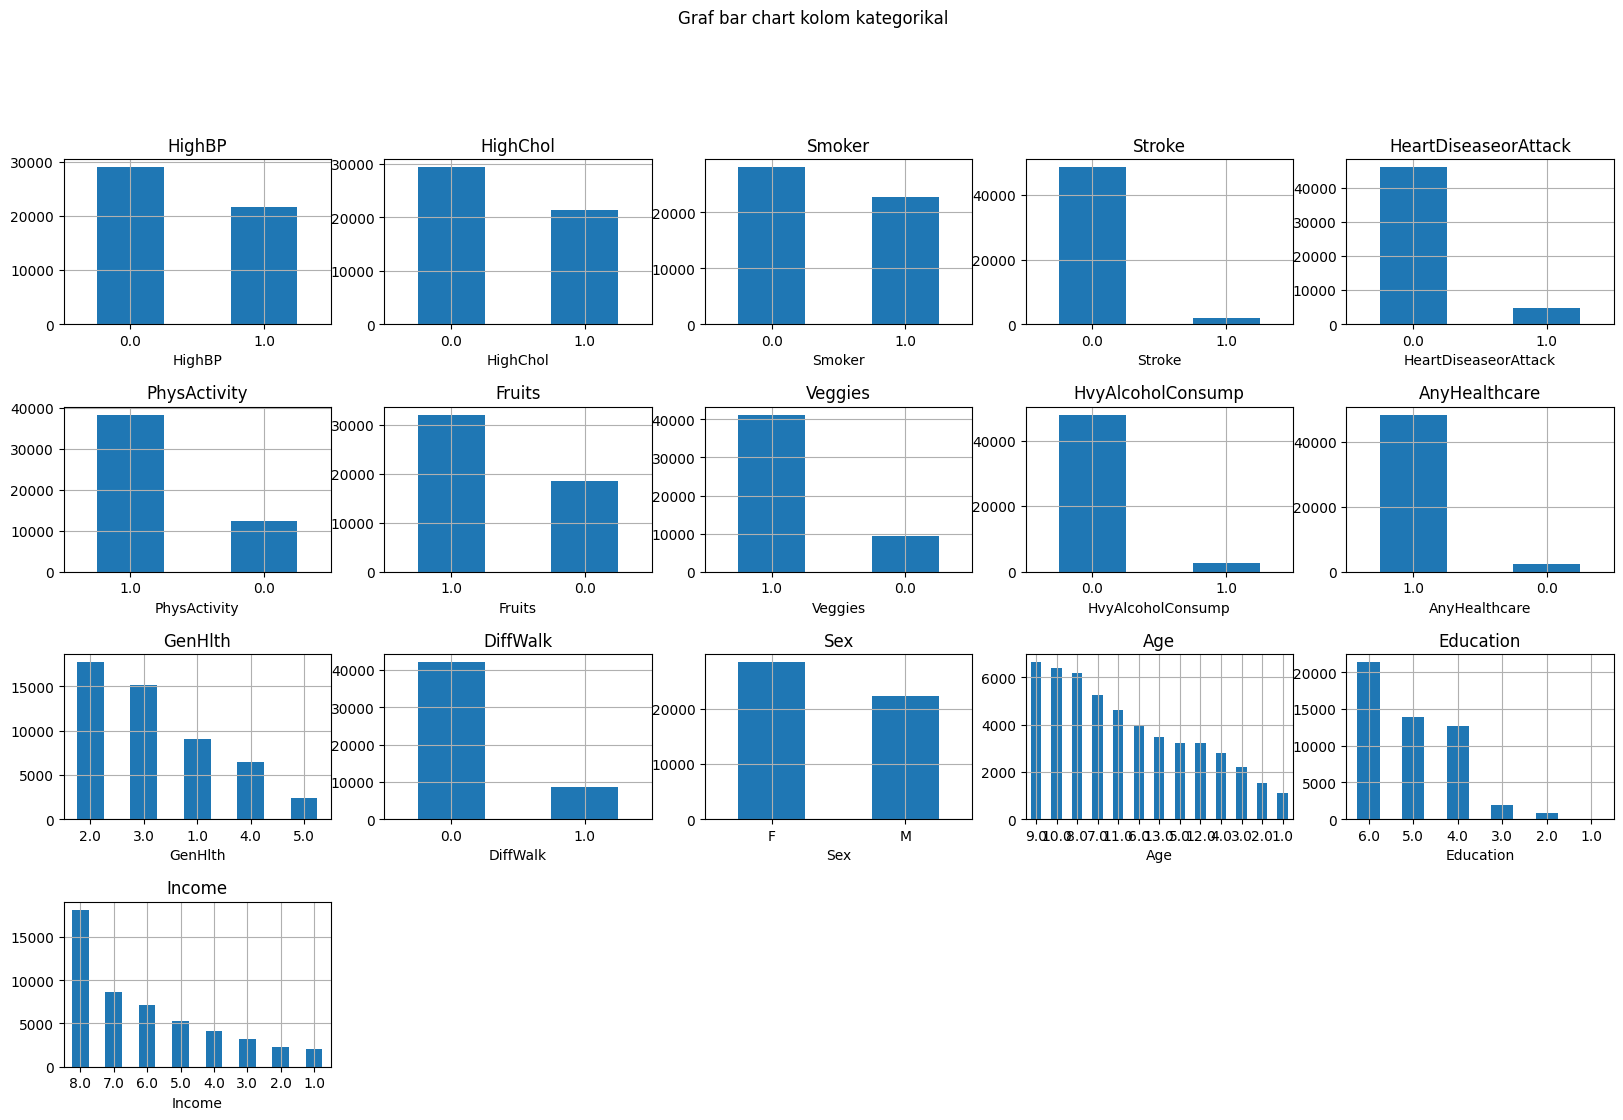

In [11]:
# Mengecek adanya outlier di kolom kategorikal

categorical_data = data[['HighBP', 'HighChol', 'Smoker', 'Stroke', 'HeartDiseaseorAttack',
       'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump',
       'AnyHealthcare', 'GenHlth', 'DiffWalk', 'Sex',
       'Age', 'Education', 'Income']]
fig = plt.figure(figsize=(20,15))
plt.subplots_adjust(hspace=0.5)
for i, col in enumerate(categorical_data.columns):
    ax = fig.add_subplot(5, 5, i+1)
    categorical_data[col].value_counts().plot(kind="bar")
    plt.xticks(rotation=0, horizontalalignment="center")
    plt.title(col)
    plt.grid()
plt.suptitle("Graf bar chart kolom kategorikal")
plt.show()

Dari data di atas, dapat dilihat bahwa tidak ada kolom yang memiliki nilai yang berbeda (sudah sesuai skala/kategori/nilai biner)

### Balance of data

In [12]:
# Balance of data
data['Diabetes'].value_counts()

Diabetes
False    43790
True      6946
Name: count, dtype: int64

Dari banyaknya nilai "False" dan "True" dari kelas target Diabetes di atas dapat dilihat bahwa terdapat kasus "imbalanced data" karena nilai "False" jauh lebih besar frekuensinya dibandingkan nilai "True"

## 3. Rencana penanganan berdasarkan analisis data

Berdasarkan analisis data berikut rencana penanganan:

#### *duplicate value*

Berdasarkan hasil analisis, ternyata sekitar 4.6% data bersifat duplikat. Hal ini tentunya akan membuat hasil pembelajaran tidak akurat. Oleh karena itu, kami akan melakukan penghapusan data duplikat.

#### *missing value*

Karena tidak ada missing value, tidak perlu penanganan untuk missing value.

#### *outlier*

Berdasarkan hasil analisis, outlier data terletak pada kolom numerik seperti BMI. Untuk menanganinya, kami akan menggunakan menghapus instance data yang memiliki nilai outlier pada setidaknya salah satu atribut numeriknya.

#### *balance of data*
Terdapat adanya *imbalanced dataset* pada kolom target, sehingga akan dilakukan strategi oversampling pada dataset minoritas dan undersampling pada dataset mayoritas.


## 4. Teknik Encoding

Berdasarkan hasil analisis data, Fitur kategorikal yang memerlukan encoding adalah fitur **Sex** dan **Diabetes** dengan keduanya bertipe Kategorikal-Nominal. 

Teknik encoding yang akan kami gunakan adalah teknik `Label Encoding`, meski label encoding biasa digunakan untuk data ordinal. Kedua fitur hanya memiliki 2 tipe, yaitu **sex hanya M dan F** dan **Diabetes hanya True dan False**. Berdasarkan hal tersebut untuk mengoptimalkan memori cukup dengan Label Encoding. Label Encoding akan memetakan **M** dan **F** pada **Sex** dan **True** dan **False** pada **Diabetes** menjadi 1 dan 0

## 5. Desain Eksperimen

### Tujuan eksperimen

Eksperimen ini bertujuan untuk memprediksi dataset diabetes dan menghasilkan model yang ideal untuk melakukan pembelajaran yang memeriksa apa seseorang memiliki diabetes atau tidak berdasarkan atribut-atribut dependen yang ada.

### Variabel dependen dan independen

Variabel dependen adalah variabel target berdasarkan *tujuan eksperimen* adalah 
1. **Diabetes**: Apakah mengalami diabetes atau tidak (kolom target)

Variabel independen adalah selain variabel target, yaitu
1. **HighBP**: Memiliki tekanan darah tinggi (BP: Blood Pressure) atau tidak
2. **HighChol**: Kolesterol tinggi atau tidak
3. **BMI**: Besaran Body Mass Index
4. **Smoker**: Perokok atau bukan perokok
5. **Stroke**: Pernah mengalami struk atau tidak
6. **HeartDiseaseorAttack**: Memiliki riwayat penyakit antara jantung koroner dan serangan jantung atau tidak sama sekali
7. **PhysActivity**: Aktif secara fisik dalam 30 hari terakhir atau tidak
8. **Fruits**: Mengonsumsi buah setiap hari atau tidak
9. **Veggies**: Mengonsumsi sayur setiap hari atau tidak
10. **HvyAlcoholConsump**: Peminum berat alkohol atau bukan
11. **AnyHealthcare**: Memiliki perlindungan kesehatan atau tidak, contohnya memiliki asuransi kesehatan
12. **GenHtlth**: Evaluasi mandiri terhadap kesehatan, skala 1-5 (1: Sangat baik, 2: Cukup Baik, 3: Baik, 4: Biasa saja, 5: Buruk)
13. **MentHlth**: Jumlah hari keadaan mental buruk dalam 30 hari terakhir (skala 0-30 hari)  
14. **PhysHlth**: Jumlah hari keadaan fisik buruk dalam 30 hari terakhir (skala 0-30 hari)
15. **DiffWalk**: Memiliki kesulitan berjalan atau menaiki tangga
16. **Sex**: (M) Male atau (F) Female
17. **Age**: 13 kategori umur (1: 18-24 tahun, 9: 60-64 tahun, 13: 80 tahun ke atas)
18. **Education**: Level edukasi skala 1-6 (1: Tidak pernah sekolah atau hanya TK, 2: SD, dst)
19. **Income**: Skala pendapatan 1-8


### Strategi eksperimen

Berikut adalah strategi tahap-tahap eksperimen yang kami laksanakan:

1. **Menangani data duplikat dan outlier, serta encoding**
2. **Dataset split & baseline training**: Membagi data menjadi data training dan data validasi dengan rasio 80:20, serta melakukan training awal memakai LogisticRegression. Proses ini sudah dilakukan di awal.
3. **Hyperparameter Tuning**: melakukan pengaturan hyperparameter dengan `Grid Search` untuk mencari kombinasi terbaik dari hyperparameter yang ada
4. **Melakukan training dengan model lain**: Kami menggunakan model lain seperti SVM, Random Forest dan Decision Learning Tree (DTL).
5. **Melakukan oversampling pada kelas minoritas atau undersampling pada kelas mayoritas**. Selain itu, model hasil tuning dilatih kembali dan dievaluasi dengan `confusion matrix` dan `classification report`.
6. **Menggabungkan beberapa model** yang sudah di-training di poin no. 3 dan 4 menggunakan Voting Classifier dan Stacking Classifier.
7. **Memilih model final** berdasarkan analisis di atas.

### Skema validasi

Skema validasi yang digunakan adalah 5-fold cross validation, karena dapat mempertahankan efisiensi komputasi serta memiliki estimasi yang baik.

# Bagian 2

## 6. Implementasi Strategi Eksperimen

### Menangani Data Duplikat

## 7. Kesimpulan

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=fa242d77-31b4-4598-b36c-d084d0aaa562' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>